## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_fwf("salary.txt", header=None, names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [3]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [5]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

<AxesSubplot:xlabel='YSdeg', ylabel='Salary'>

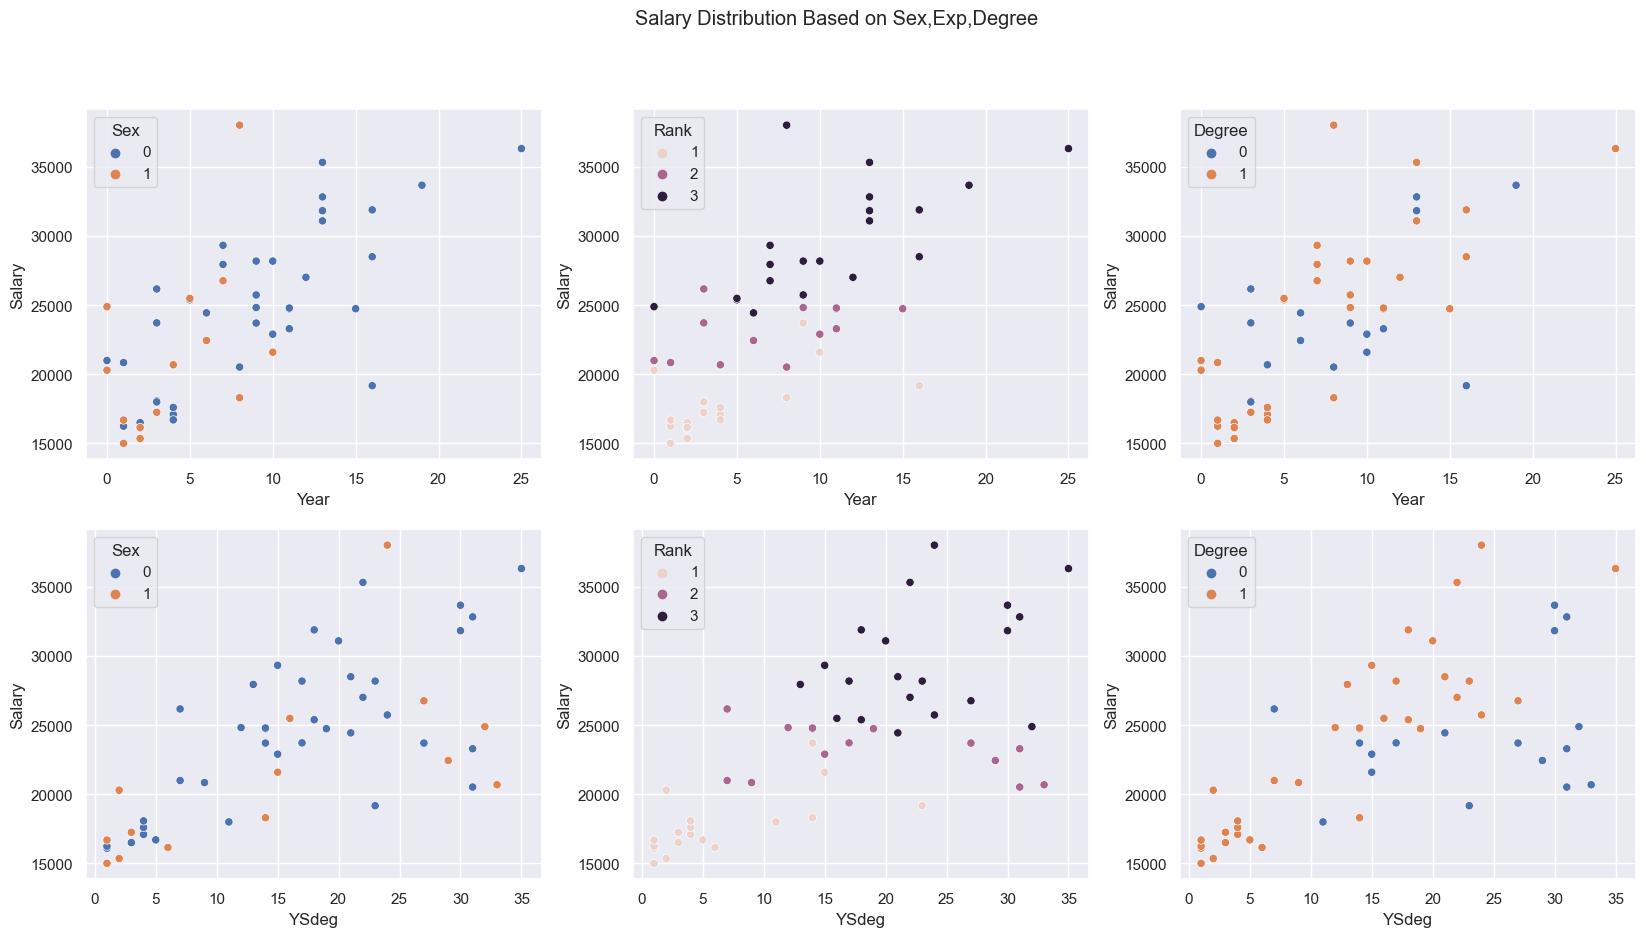

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
fig.suptitle('Salary Distribution Based on Sex,Exp,Degree')
sns.scatterplot(ax = axes[0,0],data = df, x = 'Year', y = 'Salary', hue = 'Sex')
sns.scatterplot(ax = axes[0,1],data = df, x = 'Year', y = 'Salary', hue = 'Rank')
sns.scatterplot(ax = axes[0,2],data = df, x = 'Year', y = 'Salary', hue = 'Degree')
sns.scatterplot(ax = axes[1,0],data = df, x = 'YSdeg', y = 'Salary', hue = 'Sex')
sns.scatterplot(ax = axes[1,1],data = df, x = 'YSdeg', y = 'Salary', hue = 'Rank')
sns.scatterplot(ax = axes[1,2],data = df, x = 'YSdeg', y = 'Salary', hue = 'Degree')

### Task 1
Find the linear regression equation for this data using columns 1-5 to column 6.

In [7]:
X = df.drop(['Salary'], axis = 1)
y = df[['Salary']]

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X, y)

LinearRegression()

In [11]:
print('The linear regression equation for this data with columns ["Sex", "Rank", "Year", "Degree", "YSdeg"] is \n y = {} * x + {}'
      .format(lr.coef_,lr.intercept_))

The linear regression equation for this data with columns ["Sex", "Rank", "Year", "Degree", "YSdeg"] is 
 y = [[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
   -128.79057354]] * x + [11410.14654726]


### Task 2
Find the selection of columns with the best  𝑅2  score.

In [12]:
from sklearn.metrics import r2_score
import itertools as it

In [39]:
def combination_scores(columns,df,target):
    X = df[columns]
    y = df[target]
    lr = LinearRegression()
    lr.fit(X,y)
    y_pred = lr.predict(X)
    return r2_score(y, y_pred)

In [36]:
names=["Sex", "Rank", "Year", "Degree", "YSdeg"]
combination = []
for n in range(len(names)):
    for s in it.combinations(names, n + 1):
        combination.append(list(s))

In [45]:
scores = {}
for combos in combination:
    scores[combination_scores(combos, df, target = 'Salary')] = combos

In [46]:
sorted(scores.items(), key=lambda c: c[0], reverse=True)

[(0.8547180674410968, ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']),
 (0.8490366192262851, ['Sex', 'Rank', 'Year', 'YSdeg']),
 (0.8485077204335425, ['Rank', 'Year', 'Degree', 'YSdeg']),
 (0.8456725764485596, ['Rank', 'Year', 'YSdeg']),
 (0.845547641297936, ['Sex', 'Rank', 'Year', 'Degree']),
 (0.8454319861987166, ['Sex', 'Rank', 'Year']),
 (0.8437395200874137, ['Rank', 'Year', 'Degree']),
 (0.8436480933264597, ['Rank', 'Year']),
 (0.7671813414350668, ['Sex', 'Rank', 'Degree', 'YSdeg']),
 (0.7666122610227071, ['Sex', 'Rank', 'YSdeg']),
 (0.7625149185326454, ['Rank', 'Degree', 'YSdeg']),
 (0.7623948189698249, ['Rank', 'YSdeg']),
 (0.7583144768153612, ['Sex', 'Rank', 'Degree']),
 (0.7557961688386643, ['Rank', 'Degree']),
 (0.7554917749443394, ['Sex', 'Rank']),
 (0.7525360539274631, ['Rank']),
 (0.6311597502907434, ['Sex', 'Year', 'Degree', 'YSdeg']),
 (0.6236261611533502, ['Year', 'Degree', 'YSdeg']),
 (0.5832708257660315, ['Sex', 'Degree', 'YSdeg']),
 (0.5808063918180405, ['Sex', 'Year', '

### The Selection With Best R2 Score is ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] : 0.8547180674410968.

#### But, these two features plays a important role  ['Rank', 'Year'] with a score of 0.8436480933264597

### Task 3
Report whether sex is a factor in salary.

C:\Users\wiki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

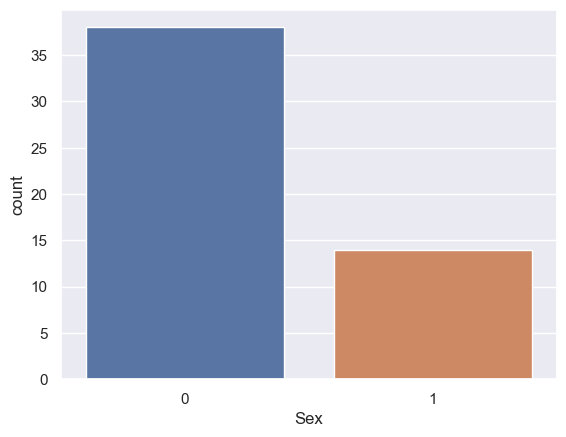

In [47]:
sns.countplot(df.Sex)

<AxesSubplot:xlabel='YSdeg', ylabel='Salary'>

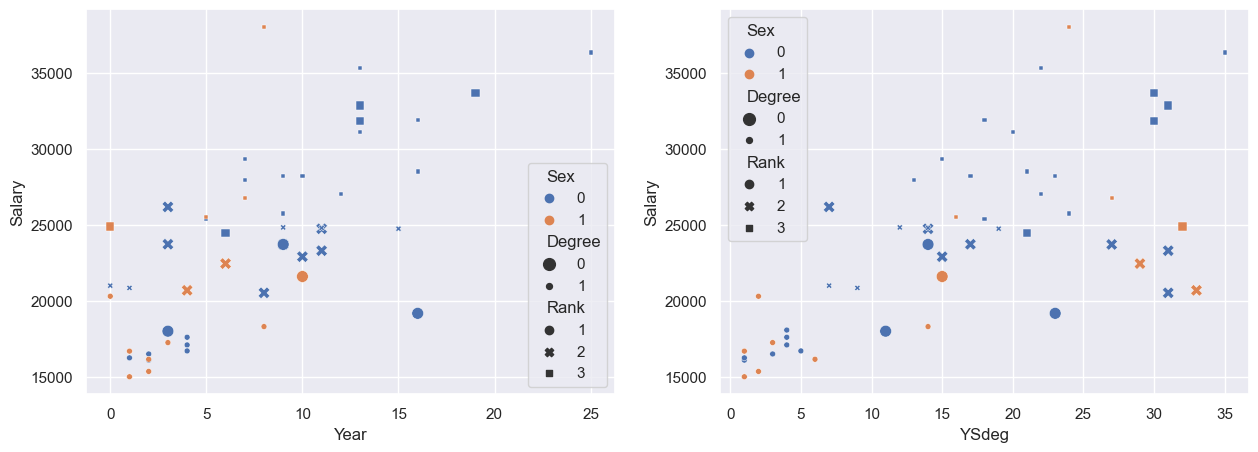

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.scatterplot(ax = axes[0],data = df, x = 'Year', y = 'Salary', hue = 'Sex' , size = 'Degree', style = 'Rank')
sns.scatterplot(ax = axes[1],data = df, x = 'YSdeg', y = 'Salary', hue = 'Sex' , size = 'Degree', style = 'Rank')

### The R2 score for the sex column is 0.06389892583288004 which indicates that gender ha no influence on salary

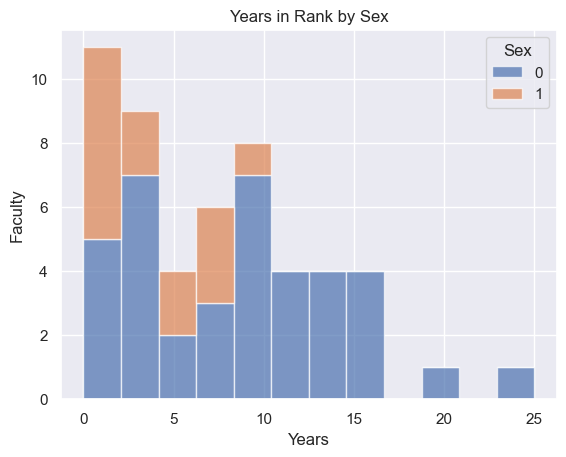

In [49]:
df.pivot_table(index=df.index, columns='Sex', values='Year') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=12,
          title='Years in Rank by Sex')
plt.xlabel('Years')
plt.ylabel('Faculty')
plt.show()


### The R2 score for the sex column is 0.06389892583288004 which indicates that gender has no influence on salary
